<a href="https://colab.research.google.com/github/Tracyyy1106/ML/blob/RandomForestRegressor/RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

file_path = '/content/household_power_consumption_household_power_consumption.csv'

data = pd.read_csv(file_path, sep=';', na_values=['?', ''], low_memory=False)

print(data.head())



  Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0      1/1/2007,0:00:00,2.58,0.136,241.97,10.6,0,0,0                                                                       
1       1/1/2007,0:01:00,2.552,0.1,241.75,10.4,0,0,0                                                                       
2        1/1/2007,0:02:00,2.55,0.1,241.64,10.4,0,0,0                                                                       
3        1/1/2007,0:03:00,2.55,0.1,241.71,10.4,0,0,0                                                                       
4       1/1/2007,0:04:00,2.554,0.1,241.98,10.4,0,0,0                                                                       


In [9]:
# check the delimiter
with open(file_path, 'r') as file:
    for i in range(5):
        print(file.readline())

# Read data using a comma as the delimiter
data = pd.read_csv(file_path, sep=',', na_values=['?', ''], low_memory=False)
data.columns = data.columns.str.strip()

print("\nUsing comma as delimiter:")
print(data.head())

print(data.columns)

# Process date and time columns
if 'Date' in data.columns and 'Time' in data.columns:
    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')
    data = data.drop(columns=['Date', 'Time'])
    print(data.head())
else:
    print("Column names do not match, please check the format and column names in the data file")


Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3

1/1/2007,0:00:00,2.58,0.136,241.97,10.6,0,0,0

1/1/2007,0:01:00,2.552,0.1,241.75,10.4,0,0,0

1/1/2007,0:02:00,2.55,0.1,241.64,10.4,0,0,0

1/1/2007,0:03:00,2.55,0.1,241.71,10.4,0,0,0


Using comma as delimiter:
       Date     Time  Global_active_power  Global_reactive_power  Voltage  \
0  1/1/2007  0:00:00                2.580                  0.136   241.97   
1  1/1/2007  0:01:00                2.552                  0.100   241.75   
2  1/1/2007  0:02:00                2.550                  0.100   241.64   
3  1/1/2007  0:03:00                2.550                  0.100   241.71   
4  1/1/2007  0:04:00                2.554                  0.100   241.98   

  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             10.6             0.0             0.0             0.0  
1             10.4             0.0             0.0             0.0

In [10]:
# Print unique values for each column
print("Unique values in each column: ")
for col in data.columns:
    print(f"{col}: {data[col].unique()[:5]}")  # first 5

# Convert all potentially numeric columns to float type
numeric_columns = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

# Check the data types of numeric columns to confirm the conversion
print(data[numeric_columns].dtypes)


Unique values in each column: 
Global_active_power: [2.58  2.552 2.55  2.554 2.534]
Global_reactive_power: [0.136 0.1   0.096 0.    0.092]
Voltage: [241.97 241.75 241.64 241.71 241.98]
Global_intensity: ['10.6' '10.4' '10.2' '11' '10.8']
Sub_metering_1: [ 0.  1.  2. 11. 39.]
Sub_metering_2: [ 0.  1.  2.  6. 39.]
Sub_metering_3: [ 0. 16. 18. 17.  9.]
Datetime: <DatetimeArray>
['2007-01-01 00:00:00', '2007-01-01 00:01:00', '2007-01-01 00:02:00',
 '2007-01-01 00:03:00', '2007-01-01 00:04:00']
Length: 5, dtype: datetime64[ns]
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Standard
data[numeric_columns] = scaler.fit_transform(data[numeric_columns].astype(float))

print(data.head())

print("After Standard：")
print(data.describe())
print(data.dtypes)

   Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
0             1.211983               0.125507  0.216146          1.139761   
1             1.188284              -0.195814  0.208503          1.099750   
2             1.186591              -0.195814  0.204682          1.099750   
3             1.186591              -0.195814  0.207113          1.099750   
4             1.189976              -0.195814  0.216493          1.099750   

   Sub_metering_1  Sub_metering_2  Sub_metering_3            Datetime  
0       -0.197231       -0.249982         -0.7046 2007-01-01 00:00:00  
1       -0.197231       -0.249982         -0.7046 2007-01-01 00:01:00  
2       -0.197231       -0.249982         -0.7046 2007-01-01 00:02:00  
3       -0.197231       -0.249982         -0.7046 2007-01-01 00:03:00  
4       -0.197231       -0.249982         -0.7046 2007-01-01 00:04:00  
After Standard：
       Global_active_power  Global_reactive_power       Voltage  \
count         2.606400

In [12]:
X = data[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = data['Global_active_power']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor()

# Training
rf.fit(X_train, y_train)

# prediction
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Training MSE (MSE):", train_mse)
print("Test MSE (MSE):", test_mse)
print("Training R^2:", train_r2)
print("Test R^2:", test_r2)







(208512, 6) (52128, 6) (208512,) (52128,)
Training MSE (MSE): 0.00014702007984658275
Test MSE (MSE): 0.0008815872636528763
Training R^2: 0.9998529613475797
Test R^2: 0.9991188577080735


In [13]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Cross-validation
rf = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("# Cross-validation MSE：", -cv_scores.mean())

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

## Create grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

# Use the best model for prediction
best_rf = grid_search.best_estimator_
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Training MSE (MSE):", train_mse)
print("Test MSE (MSE):", test_mse)
print("Training R^2:", train_r2)
print("Test R^2:", test_r2)


# Cross-validation MSE： 0.0009313976267427947
Best hyperparameters:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Training MSE (MSE): 0.00028975037903479793
Test MSE (MSE): 0.0008407359574961451
Training R^2: 0.9997102130177319
Test R^2: 0.9991596883949712


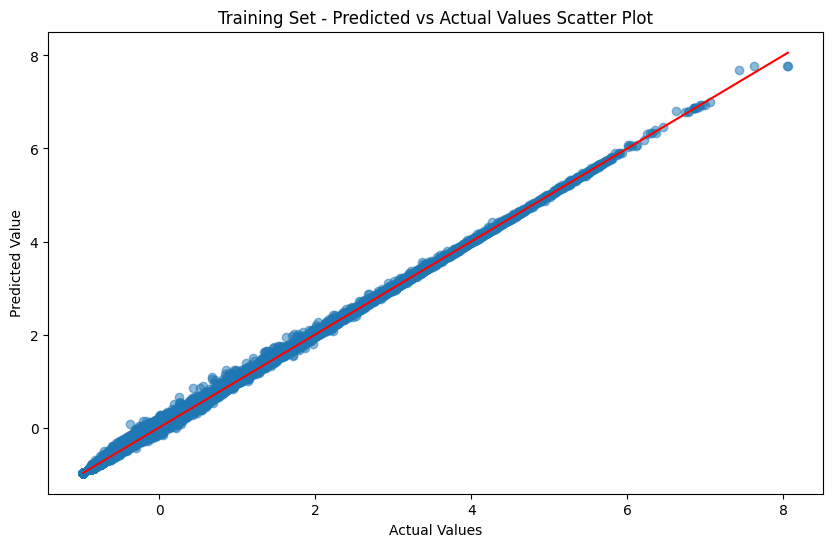

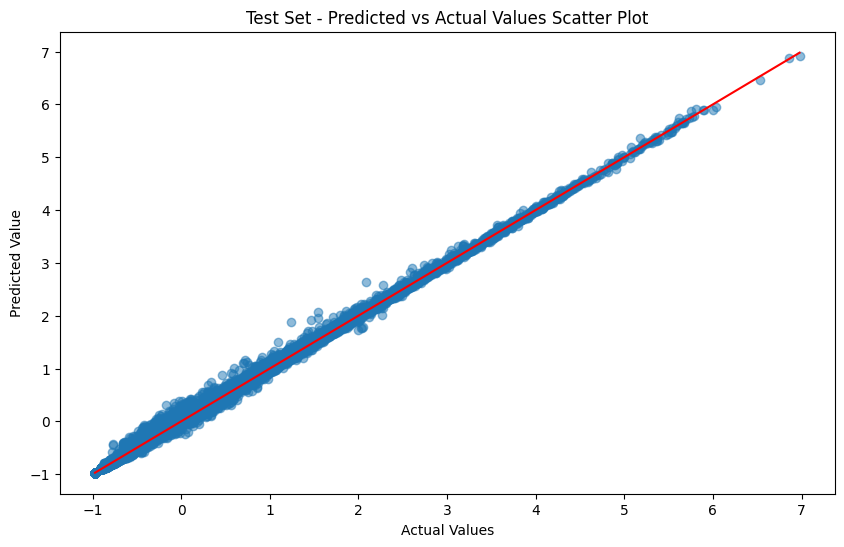

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# predicted vs actual values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Value')
plt.title('Training Set - Predicted vs Actual Values Scatter Plot')
plt.show()

# predicted vs actual values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Value')
plt.title('Test Set - Predicted vs Actual Values Scatter Plot')
plt.show()
